# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Habtom Woldu 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [109]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
# from spacytextblob.spacytextblob import SpacyTextBlob
from spacytextblob.spacytextblob import SpacyTextBlob




!pip list

print('All prereqs installed.')

Package             Version
------------------- -----------
annotated-types     0.6.0
asttokens           2.4.1
beautifulsoup4      4.12.3
blis                0.7.11
catalogue           2.0.10
certifi             2024.2.2
charset-normalizer  3.3.2
click               8.1.7
cloudpathlib        0.16.0
colorama            0.4.6
comm                0.2.2
confection          0.1.4
contourpy           1.2.1
cycler              0.12.1
cymem               2.0.8
debugpy             1.8.1
decorator           5.1.1
en-core-web-sm      3.7.1
exceptiongroup      1.2.0
executing           2.0.1
fonttools           4.51.0
html5lib            1.1
idna                3.6
importlib_metadata  7.1.0
importlib_resources 6.4.0
ipykernel           6.29.4
ipython             8.18.1
jedi                0.19.1
Jinja2              3.1.3
joblib              1.4.0
jupyter_client      8.6.1
jupyter_core        5.7.2
kiwisolver          1.4.5
langcodes           3.3.0
MarkupSafe          2.1.5
matplotlib          3.

The link provided the article I am intersted in https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7951562/


1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [117]:
import requests
import pickle
r= requests.get("https://www.nature.com/articles/s41598-023-41478-7")
with open('python-match.pkl','wb') as f:
    pickle.dump(r.text,f)

In [118]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
url = ("https://www.nature.com/articles/s41598-023-41478-7")
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)
# Fetch the webpage content
response = requests.get(url)
article_page = requests.get(url)
article_html= article_page.text
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the article content
article_content = soup.find('article').prettify()



print("Article content dumped to article_content.pkl")

Article content dumped to article_content.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [127]:
import pickle 
import spacy
from bs4 import BeautifulSoup
from spacytextblob.spacytextblob import SpacyTextBlob

with open('python-match.pkl', 'rb') as f:  
    htmldoc = pickle.load(f)

soup = BeautifulSoup(htmldoc, 'html.parser')

# Find the article element
article_element = soup.find("article")

# Check if article_element is None
if article_element is None:
    print("Article element not found. HTML content:")
    print(soup.prettify())
    # Add additional handling if necessary
else:
    # Get the text content of the article
    article_text = article_element.get_text()
    
    # Load spaCy model
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe('spacytextblob')
    
    # Process the text with spaCy
    doc = nlp(article_text)
    
    # Print the polarity score of the article
    print("Polarity Score of the Article:", doc._.blob.polarity)
i=0
 # Count the number of sentences in the article
num_sentences = len(list(doc.sents))
print("Number of Sentences in Article:", num_sentences)


Polarity Score of the Article: 0.0783832733809628
Number of Sentences in Article: 431


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [130]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Load the HTML content from the pickle file
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(htmldoc, 'html5lib')

# Find the article text
text = soup.find('article').get_text()

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the SpacyTextBlob component to the pipeline
nlp.add_pipe('spacytextblob')

# Process the article text with spaCy
doc = nlp(text)

# Define function to filter out non-important tokens
def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Extract important tokens
important_tokens = [token.text.lower() for token in doc if cool_words(token)]

# Count the frequencies of the lowercase important tokens
word_freq = Counter(important_tokens)

# Print the 5 most common tokens and their frequencies
print("Top 5 most frequent tokens and their frequencies:")
for token, freq in word_freq.most_common(5):
    print(f"{token}: {freq}")


Top 5 most frequent tokens and their frequencies:
covid-19: 131
vaccine: 109
vaccines: 100
tweets: 80
countries: 56


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [132]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter

# Load the HTML content from the pickle file
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(htmldoc, 'html5lib')

# Find the article text
text = soup.find('article').get_text()

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the SpacyTextBlob component to the pipeline
nlp.add_pipe('spacytextblob')

# Process the article text with spaCy
doc = nlp(text)

# Define function to filter out non-important tokens
def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Extract important lemmas
important_lemmas = [token.lemma_.lower() for token in doc if cool_words(token)]

# Count the frequencies of the lowercase important lemmas
word_freq = Counter(important_lemmas)

# Print the 5 most common lemmas and their frequencies
print("Top 5 most frequent lemmas and their frequencies:")
for lemma, freq in word_freq.most_common(5):
    print(f"{lemma}: {freq}")


Top 5 most frequent lemmas and their frequencies:
vaccine: 208
covid-19: 131
tweet: 85
country: 76
vaccination: 58


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

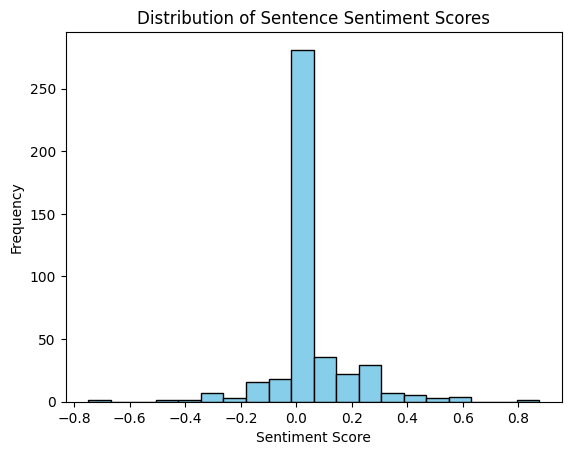

In [133]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Load the HTML content from the pickle file
with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(htmldoc, 'html5lib')

# Find the article text
text = soup.find('article').get_text()

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Add the SpacyTextBlob component to the pipeline
nlp.add_pipe('spacytextblob')

# Process the article text with spaCy
doc = nlp(text)

# Calculate sentiment scores for each sentence
sentence_scores = [sentence._.polarity for sentence in doc.sents]

# Plot a histogram of the sentence scores
plt.hist(sentence_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?